# KMeans clustering

K-Means Clustering is an unsupervised learning algorithm to solve the clustering problems in machine learning or data science.
which groups the unlabeled dataset into different clusters. Here K is the number of pre-defined clusters that need to be created in the process.         
It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a maner that each dataset belongs only one group that has similar properties.               
It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding centroid.              
Steps of algorithm:             

Step-1: Select the number K to decide the number of clusters.             
Step-2: Select random K points or centroids. (It can be other than the input dataset).                 
Step-3: Assign each data point to their closest centroid, which will form the predefined K clusters.               
Step-4: Calculate the variance and place a new centroid for each cluster.              
Step-5: Repeat the steps-3, which means reassign each datapoint to the new closest centroid of each cluster.        
Step-6: If any reassignment occurs, then go to step-4 else go to step-7.                 
Step-7: The model is ready.

  As we need to find the closest cluster, so we will repeat the process by choosing a new centroid. To choose the new centroids, we will compute the center of gravity of these centroids, and will find new centroids.                
**How to decide value of k:**                          
The Elbow method is to find the optimal number of clusters. This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster.                   

An elbow method to find the optimal value of clusters:             

-It executes the K-means clustering on a given dataset for different K values (ranges from 1-10).                    
-For each value of K, calculates the WCSS value.               
-Plots a curve between calculated WCSS values and the number of clusters K.          
-The sharp point of bend or a point of the plot looks like an arm, then that point is considered as the best value of K.         

### Apply KMeans clustering on the Employee_income.xlsx dataset and identify exact clusters using Elbow method to model the algorithm

##### Import required libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

##### Read data feom xlsx file and check first five records

In [2]:
df = pd.read_excel('Employee_info.xlsx')
df.head()

,Name,Age,Income
0,Amit,27,70000
1,Akash,29,90000
2,Shriya,29,61000
3,Anita,28,62000
4,Sudhir,42,155000


In [3]:
ms = MinMaxScaler()
df[['Age','Income']] = ms.fit_transform(df[['Age','Income']])
df

,Name,Age,Income
0,Amit,0.058824,0.208333
1,Akash,0.176471,0.375000
2,Shriya,0.176471,0.133333
3,Anita,0.117647,0.141667
4,Sudhir,0.941176,0.916667
5,Gajanan,0.764706,0.958333
6,Ranjit,0.882353,0.975000
7,Jyotsna,0.705882,0.925000
8,Nitish,0.588235,0.708333
9,Onkar,0.529412,0.758333


In [4]:
X = df[['Age','Income']]
X

,Age,Income
0,0.058824,0.208333
1,0.176471,0.375000
2,0.176471,0.133333
3,0.117647,0.141667
4,0.941176,0.916667
5,0.764706,0.958333
6,0.882353,0.975000
7,0.705882,0.925000
8,0.588235,0.708333
9,0.529412,0.758333


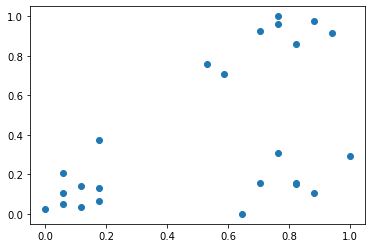

In [5]:
# Check data distribution

plt.scatter(X['Age'],X['Income'])
plt.show()

In [6]:
# Create object of kmeans

km = KMeans(n_clusters=3)

In [7]:
# Train the model and get predicted values

km.fit(df[['Age','Income']])

KMeans(n_clusters=3)

In [8]:
# Check inertia of model

km.inertia_

0.4920193431403064

In [9]:
# Check for centroides

km.cluster_centers_

array([[0.75      , 0.8875    ],
       [0.10457516, 0.12731481],
       [0.80672269, 0.16785714]])

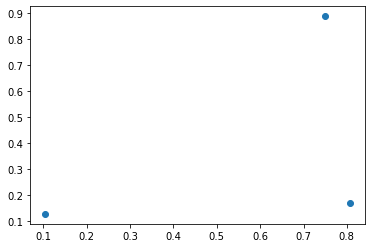

In [10]:
# Check data distribution of centroides

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1])
plt.show()

In [11]:
# Use elbow method to find count of clusters

WCSS = []
for i in range(1,11):
    km = KMeans(n_clusters = i)
    km.fit(df[['Age','Income']])
    WCSS.append(km.inertia_)

In [12]:
WCSS

[5.9897601858860385,
 2.372901455312518,
 0.4920193431403064,
 0.331177199093145,
 0.2563456831364082,
 0.1914370079016084,
 0.1625110259075035,
 0.1294572124703639,
 0.09349698483355756,
 0.06913999923907468]

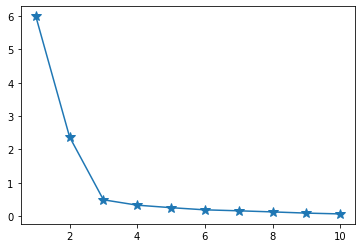

In [13]:
# Plot WCSS score for 10 values of centroide count

plt.plot(range(1,11),WCSS,marker = '*',markersize = 10)
plt.show()

In [14]:
km = KMeans(n_clusters=3)

In [15]:
y_pred = km.fit_predict(df[['Age','Income']])
y_pred

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0,
       2, 1])

In [16]:
%matplotlib inline

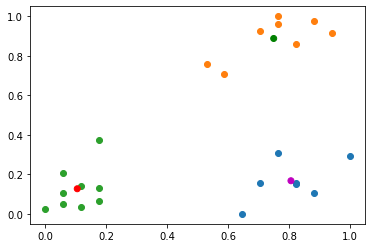

In [17]:
#plt.scatter(x[y_predict[0][]])

plt.scatter(X[y_pred==0]['Age'],X[y_pred==0]['Income'],label='Cluster 1')
plt.scatter(X[y_pred==1]['Age'],X[y_pred==1]['Income'],label='Cluster 2')
plt.scatter(X[y_pred==2]['Age'],X[y_pred==2]['Income'],label='Cluster 3')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c=['m','g','r'])
plt.show()

Hence there are three culsters in input data.